In [32]:
import numpy as np
import pandas as pd

import os
import os.path
#from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6
#from Functions_ImportData import import_BC_NOAA_NEX_GDDP_CMIP6
#from Functions_ImportData import import_BC_Gorongosa_NEX_GDDP_CMIP6
from Functions_ImportData import add_year_month_season

from Potential_evapostranspiration_function import PET

def filter_data(df,loc,mod_excl): # Filter data by location, models, and time period
    df = df[df['Name project']==loc]
    df = df[~df['Model'].isin(mod_excl)]
    df=add_year_month_season(df,'Date')
    return df

Source of image : https://link.springer.com/article/10.1007/s10584-021-03122-z, section 3.2

Indications are misleading the results : RH_mean should be [-] (divide the value in percent by 100). The equation used here divide by 100 the number of RH_mean placed in the equation

In [2]:
# ctrl * for at udkommentere tekst!!!! 

Objectif: find the number of cumulative days per year with positive net precipitation (Pr - E)

# Project information that could be useful

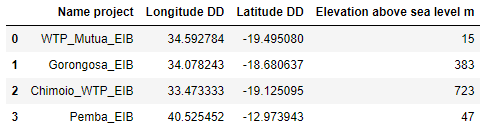

# Defined by user 

In [33]:
# CHANGE ACCORDING TO PURPOSE 
loc='Gorongosa_EIB'
mod_excl=['NESM3','CMCC-CM2-SR5','TaiESM1']
yr_past=np.array([1980, 2014])
yr_future=np.array([2030,2060])

#PATHS DATA INPUT
#precipitation 
path_pr=r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1950-2100\pr_1950-2100_projectsMoz.csv'
#tas: daily mean temperature
path_tas=r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1950-2100\tas_1950-2100_projectsMoz.csv'
#tasmin: minimum daily temperature 
path_tasmin=r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmin\tasmin_Celsius_day_1950-2100\tasmin_1950-2100_projectsMoz.csv'
#tasmax: maximum daily temperature 
path_tasmax=r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1950-2100\tasmax_1950-2100_projectsMoz.csv'
#rs: radiaion (MJ.m-2.day-1)
path_rs=r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\rsds\rsds_MJ.m-2.day-1_day_1950-2100\rsds_1950-2100_projectsMoz.csv'
# near surface relative humidity RH 
path_RH=r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\hurs\hurs_%_day_1950-2100\hurs_1950-2100_projectsMoz.csv'
# Daily-Mean Near-Surface Wind Speed [m_s-1]
path_wind10=r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\sfcWind\sfcWind_m_s-1_day_1950-2100\sfcWind_1950-2100_projectsMoz.csv'


# Evapotranspiration at Gorongosa

#### needed parameters

Air temperature in degrees, normal, max and min

Downwelling short Rs in MJ/(m^2.day)

For calculation of Rnl (net longwave radiaiton, used for calculation of net radiation), need to know lat and month for the calculation to calculate Ra

Wind at 2 m [m/s], height where measurement taken is approx 10 m

Mean relative humidity in %

## Read all data sheets 

In [13]:
#READ PRECIPITATION 
df_pr=pd.read_csv(path_pr)
df_pr=filter_data(df_pr,loc,mod_excl)
df_pr_past=df_pr[df_pr['Year'].between(yr_past[0],yr_past[1])]
df_pr_future=df_pr[df_pr['Year'].between(yr_future[0],yr_future[1])]

#READ TAS (DAILY MEAN TEMPERATURE)
df_tas=pd.read_csv(path_tas)
df_tas=filter_data(df_tas,loc,mod_excl)
df_tas_past=df_tas[df_tas['Year'].between(yr_past[0],yr_past[1])]
df_tas_future=df_tas[df_tas['Year'].between(yr_future[0],yr_future[1])]

#READ TASMIN (DAILY MINIMUM TEMPERATURE)
df_tasmin=pd.read_csv(path_tasmin)
df_tasmin=filter_data(df_tasmin,loc,mod_excl)
df_tasmin_past=df_tasmin[df_tasmin['Year'].between(yr_past[0],yr_past[1])]
df_tasmin_future=df_tasmin[df_tasmin['Year'].between(yr_future[0],yr_future[1])]

#READ TASMAX (DAILY MAXIMUM TEMPERATURE)
df_tasmax=pd.read_csv(path_tasmax)
df_tasmax=filter_data(df_tasmax,loc,mod_excl)
df_tasmax_past=df_tasmax[df_tasmax['Year'].between(yr_past[0],yr_past[1])]
df_tasmax_future=df_tasmax[df_tasmax['Year'].between(yr_future[0],yr_future[1])]

#READ RADIATION DATA  (MJ.m-2.day-1)
df_rs=pd.read_csv(path_rs)
# evt. udkommentér  # camille laver noget med drop (se Netprecipitation file), men tror ikke det er aktuelt her
df_rs=filter_data(df_rs,loc,mod_excl)
df_rs_past=df_rs[df_rs['Year'].between(yr_past[0],yr_past[1])]
df_rs_future=df_rs[df_rs['Year'].between(yr_future[0],yr_future[1])]

#READ NEAR SURFACE RELATIVE HUMIDITY PERCENTAGE 
df_RH=pd.read_csv(path_RH)
df_RH=filter_data(df_RH,loc,mod_excl)
df_RH_past=df_RH[df_RH['Year'].between(yr_past[0],yr_past[1])]
df_RH_future=df_RH[df_RH['Year'].between(yr_future[0],yr_future[1])]

#READ WIND SPEED DATA: Daily-Mean Near-Surface Wind Speed [m_s-1]
df_wind10=pd.read_csv(path_wind10)
df_wind10=filter_data(df_wind10,loc,mod_excl)
df_wind2=df_wind10.copy(deep=True) #Convert to 2 meters above ground instead of initial 10 meters
z=10 #height above ground where the wind was measures 
df_wind2[['Daily-Mean Near-Surface Wind Speed m_s-1']]=df_wind2[['Daily-Mean Near-Surface Wind Speed m_s-1']]*(4.87/(np.log((67.8*z)-5.42)))
df_wind2_past=df_wind2[df_wind2['Year'].between(yr_past[0],yr_past[1])]
df_wind2_future=df_wind2[df_wind2['Year'].between(yr_future[0],yr_future[1])]

#READ sheet for radiation data acoording to month and latitude
path_Ra = r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\calculate_PET\Ra\Table2-Ra.csv'
Ra=pd.read_csv(path_Ra)


##  Dataframe to record the PET
Duplicate the one with pr, put nan in it.
Need to take in account changing month and lat

In [14]:
df_PET = df_pr.copy(deep=True)
ssps=list(df_PET.Experiment.unique())
ssps2=list(set(df_PET['Experiment']))
print(ssps)
print(ssps2)

['historical', 'ssp245', 'ssp585', 'ssp126', 'ssp370']
['ssp126', 'historical', 'ssp585', 'ssp370', 'ssp245']


In [19]:
latitude = -18.680637 # gorongosa
z_station= 383 #gorongosa m above sealevel
def filtr(df,date,model,ssp,col):
    dfa=df.set_index(['Model','Experiment','Date'])
    if (model,ssp,date) in dfa.index:
        return dfa.loc[(model,ssp,date),col]
    else:
        return np.nan
    
def dataframe_net_pr(df_pr,df_tas,df_tasmax,df_tasmin,df_Rs,df_RH,df_wind2,latitude,z_station,Ra):   
    # prepare dataframe to fill
    # dataframe for potential evapotranspiration
    df_PET = df_pr.copy(deep=True)
    df_PET.rename(columns={'Mean of the daily precipitation rate mm_per_day':'Potential evapotranspiration mm'},inplace=True)
    ssps=list(df_PET.Experiment.unique())
    models=list(df_PET.Model.unique())
    dates=list(df_PET.Date.unique())
    df_PET=df_PET.set_index(['Model','Experiment','Date'])
    df_PET[['Potential evapotranspiration mm']] = np.nan
    # dataframe for net precipitation
    df_Net_Pr = df_PET.copy(deep=True)
    df_Net_Pr.rename(columns={'Potential evapotranspiration mm':'Net precipitation mm'},inplace=True)

    for ssp in ssps[1:3]: #remove the [1] when know it runs 
        for model in models[1:3]:  #remove the [1] when know it runs
            for date in dates[1:3]:  #remove the [1:100] when know it runs
                
                # what are the values of the parameters for the ssp, model and date precised ?
                T=filtr(df_tas,date,model,ssp,'Daily Near-Surface Air Temperature °C')
                #print('T=',T)
                T_max=filtr(df_tasmax,date,model,ssp,'Daily Maximum Near-Surface Air Temperature °C')
                #print('Tmax=',T_max)
                T_min=filtr(df_tasmin,date,model,ssp,'Daily Minimum Near-Surface Air Temperature °C')
                #print('Tmin=',T_min)
                Rs_=filtr(df_Rs,date,model,ssp,'Surface Downwelling Shortwave Radiation MJ.m-2.day-1')
                #print('Rs=',Rs_)
                RH_mean=filtr(df_RH,date,model,ssp,'Near-Surface Relative Humidity %')
                wind2=filtr(df_wind2,date,model,ssp,'Daily-Mean Near-Surface Wind Speed m_s-1')
                
                month=filtr(df_pr,date,model,ssp,'Month')
                df_PET.loc[(model,ssp,date),'Potential evapotranspiration mm']=PET(T,T_max,T_min,Rs_,RH_mean,wind2,z_station,latitude,month,Ra)*1.2 # Open water evaporation from reservoirs may be estimated by multiplying PET by a factor of 1.2. source: 3.Evapotranspiration -FAO
                df_Net_Pr.loc[(model,ssp,date),'Net precipitation mm']=filtr(df_pr,date,model, ssp,'Mean of the daily precipitation rate mm_per_day')-df_PET.loc[(model,ssp,date),'Potential evapotranspiration mm']*1.2 #filtr(df_PET, date, model, ssp, 'Potential evapotranspiration mm')
               # filtr(df_PET,date,model,ssp,'Potential evapotranspiration mm')=PET(T,T_max,T_min,Rs_,RH_mean,wind2,z_station_elevation,lat,month)
               # filtr(df_Net_pr,date,model,ssp,'Net precipitation mm') = filtr(df_pr,date,model, ssp,'Mean of the daily precipitation rate mm_per_day')- filtr(df_PET, date, model, ssp, 'Potential evapotranspiration mm')


#                 month = df_pr.at[df_pr[(df_pr['Date']==date)&(df_pr['Model']==model)&(df_pr['Experiment']==ssp)].index[0],'Month']   # calculate value of PET
#                 df_PET.loc[(df_PET['Date']==date)&(df_PET['Model']==model)&(df_PET['Experiment']==ssp),'Potential evapotranspiration mm'] = PET(T,T_max,T_min,Rs_,RH_mean,wind2,z_station_elevation,lat,month)
#                 df_Net_Pr.loc[(df_Net_Pr['Date']==date)&(df_Net_Pr['Model']==model)&(df_Net_Pr['Experiment']==ssp),'Net precipitation mm'] = df_pr.loc[(df_pr['Date']==date)&(df_pr['Model']==model)&(df_pr['Experiment']==ssp),'Mean of the daily precipitation rate mm_per_day'] - df_PET.loc[(df_PET['Date']==date)&(df_PET['Model']==model)&(df_PET['Experiment']==ssp),'Potential evapotranspiration mm']

    return df_PET, df_Net_Pr


In [20]:
(df_PET_future, df_netPr_future)=dataframe_net_pr(df_pr_future,df_tas_future,df_tasmax_future,df_tasmin_future,df_rs_future,df_RH_future,df_wind2_future,latitude,z_station,Ra)

C:\Users\nadb\AppData\Local\Temp\1\ipykernel_3816\1879462526.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_PET.loc[(model,ssp,date),'Potential evapotranspiration mm']=PET(T,T_max,T_min,Rs_,RH_mean,wind2,z_station,latitude,month,Ra)*1.2 # Open water evaporation from reservoirs may be estimated by multiplying PET by a factor of 1.2. source: 3.Evapotranspiration -FAO
C:\Users\nadb\AppData\Local\Temp\1\ipykernel_3816\1879462526.py:42: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_Net_Pr.loc[(model,ssp,date),'Net precipitation mm']=filtr(df_pr,date,model, ssp,'Mean of the daily precipitation rate mm_per_day')-df_PET.loc[(model,ssp,date),'Potential evapotranspiration mm']*1.2 #filtr(df_PET, date, model, ssp, 'Potential evapotranspiration mm')
C:\Users\nadb\AppData\Local\Temp\1\ipykernel_3816\1879462526.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_PET.loc[(model,ssp,date),'Potential eva

In [31]:



d = {'col1': [1, 2], 'col2': [3, 4]}
PET_test= pd.DataFrame(data=d)
out_path=r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\calculate_PET\netPrec_future'
netPre_path=os.path.join(out_path,"df_netPr_future_2030_2060.csv")
PET_path=os.path.join(out_path,"df_PET_future_2030_2060.csv")
PET_test.to_csv(PET_path,sep=';')

# if not os.path.isdir(path_for_csv):
#          # the path to the file does not exist
#     os.makedirs(path_for_csv) # to ensure creation of the folder
#             # creation of the path for the csv file, in a string format
# full_name = os.path.join(path_for_csv,title_file)
#         # ..... and the dataframe is registered in a csv file
# df.to_csv(full_name) 
#df_netPr_future.to_csv(netPre_path)
#df_PET_future.to_csv(df_PET_future)


In [41]:
path_netPr=r'\\cowi.net\projects\A245000\A248363\CRVA\Datasets\calculate_PET\netPrec_future\df_netPr_future_2030_2060.csv'
df_netPr=pd.read_csv(path_netPr,sep=';')
df_netPr[~df_netPr['Net precipitation mm'].isna()]

#df_netPr['Net precipitaion mm']
#df_RH=filter_data(df_RH,loc,mod_excl)
#df_RH_past=df_RH[df_RH['Year'].between(yr_past[0],yr_past[1])]
#df_RH_future=df_RH[df_RH['Year'].between(yr_future[0],yr_future[1])]

,Model,Experiment,Date,Name project,Latitude,Longitude,Net precipitation mm,Year,Month,Season
147200,ACCESS-ESM1-5,ssp585,02-01-2030,Gorongosa_EIB,-18.625,34.125,23.266443,2030,Jan,Humid
147201,ACCESS-ESM1-5,ssp585,03-01-2030,Gorongosa_EIB,-18.625,34.125,24.742159,2030,Jan,Humid
283076,ACCESS-ESM1-5,ssp126,02-01-2030,Gorongosa_EIB,-18.625,34.125,20.102673,2030,Jan,Humid
283077,ACCESS-ESM1-5,ssp126,03-01-2030,Gorongosa_EIB,-18.625,34.125,11.105224,2030,Jan,Humid
